In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

# Plot Loss

In [6]:
def get_latest_version(log_dir="output/lightning_logs"):
    version_dirs = [d for d in os.listdir(log_dir) if d.startswith("version_") and os.path.isdir(os.path.join(log_dir, d))]
    if not version_dirs:
        return None  # Return None if no version folders found

    latest_version = max(version_dirs, key=lambda v: int(v.split('_')[-1]))
    return os.path.join(log_dir, latest_version)

In [11]:
latest_version_path = get_latest_version()
metrics_file_path = os.path.join(latest_version_path, "metrics.csv")
print(metrics_file_path)

log_data = pd.read_csv(metrics_file_path)
log_data.head()

output/lightning_logs/version_23/metrics.csv


,epoch,lr-AdamW,step,test_loss,train_loss,val_loss
0,NaN,0.0001,0,NaN,NaN,NaN
1,0.0,NaN,122,NaN,0.130499,NaN
2,NaN,0.0001,123,NaN,NaN,NaN
3,1.0,NaN,245,NaN,0.111609,NaN
4,NaN,0.0001,246,NaN,NaN,NaN


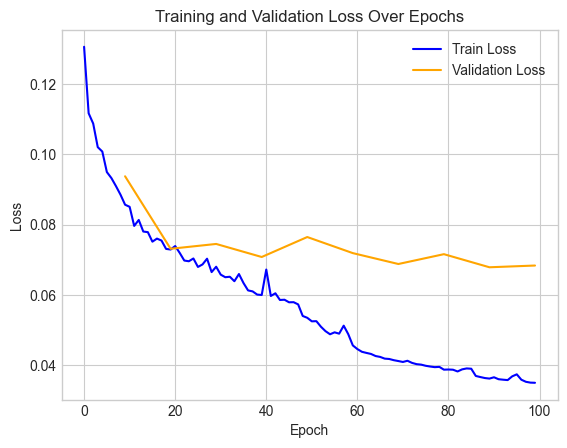

In [12]:
# Drop rows with NaN values in loss columns
train_loss = log_data[['epoch', 'train_loss']].dropna()
val_loss = log_data[['epoch', 'val_loss']].dropna()

# Plotting the losses
plt.plot(train_loss['epoch'], train_loss['train_loss'], label='Train Loss', color='blue')
plt.plot(val_loss['epoch'], val_loss['val_loss'], label='Validation Loss', color='orange')

# Adding labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()